<a href="https://colab.research.google.com/github/Akash-mahandargi/PCA/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df= pd.read_csv('/content/wine.csv')

In [36]:
# Basic info
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nSample rows:\n", df.head())


Shape: (178, 14)
Columns: ['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue', 'Dilution', 'Proline']

Data types:
 Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

Missing values:
 Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

Sample rows:
    Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Fl

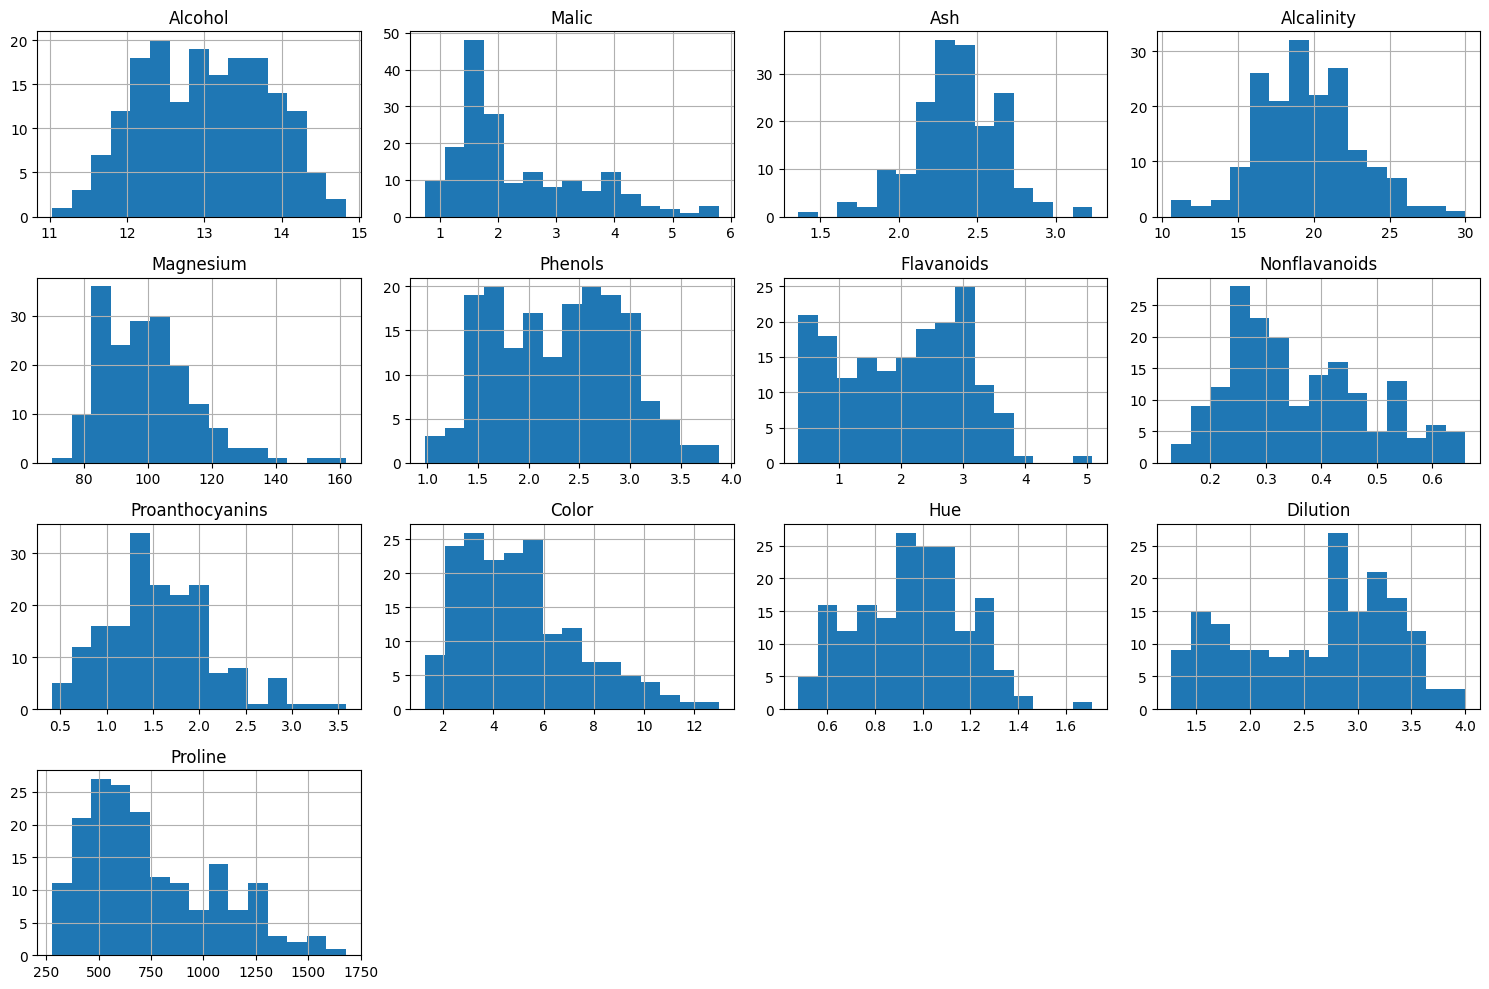

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop 'Type' so we plot only features
features = df.drop('Type', axis=1)

features.hist(bins=15, figsize=(15,10), layout=(4,4))
plt.tight_layout()
plt.show()


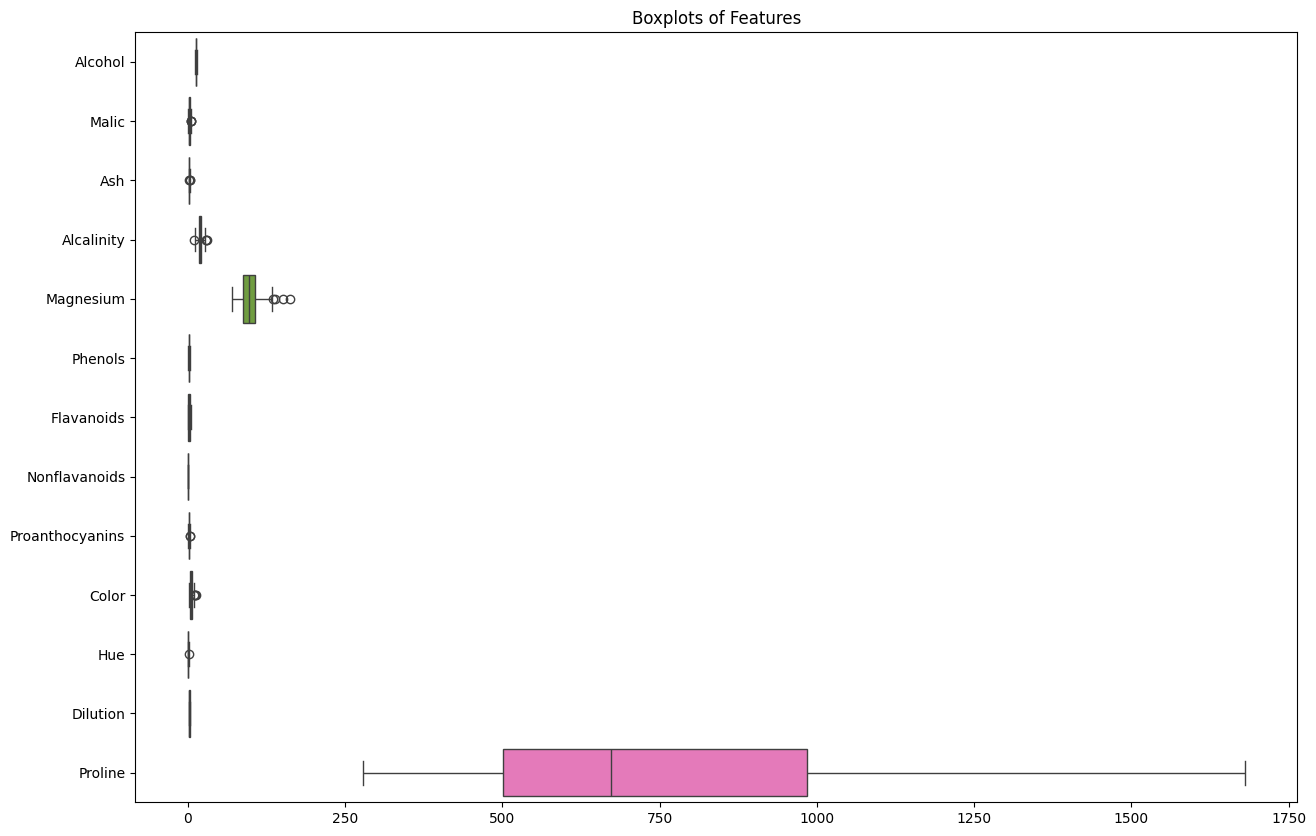

In [38]:
plt.figure(figsize=(15,10))
sns.boxplot(data=features, orient="h")
plt.title("Boxplots of Features")
plt.show()


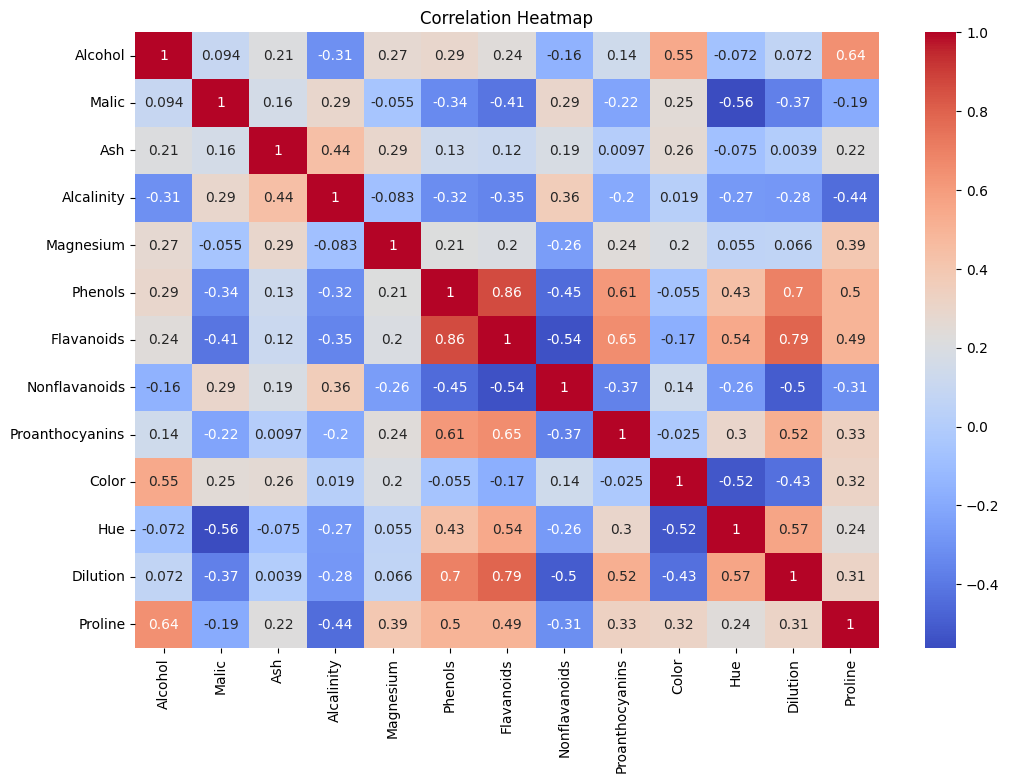

In [39]:
corr = features.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [40]:
from sklearn.preprocessing import StandardScaler

# Separate features
X = df.drop("Type", axis=1)

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easy viewing
import numpy as np

X_scaled_df = pd.DataFrame(
    X_scaled,
    columns=X.columns
)

print(X_scaled_df.head())
print("\nMeans:\n", X_scaled_df.mean())
print("\nStandard Deviations:\n", X_scaled_df.std())


    Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  Flavanoids  \
0  1.518613 -0.562250  0.232053   -1.169593   1.913905  0.808997    1.034819   
1  0.246290 -0.499413 -0.827996   -2.490847   0.018145  0.568648    0.733629   
2  0.196879  0.021231  1.109334   -0.268738   0.088358  0.808997    1.215533   
3  1.691550 -0.346811  0.487926   -0.809251   0.930918  2.491446    1.466525   
4  0.295700  0.227694  1.840403    0.451946   1.281985  0.808997    0.663351   

   Nonflavanoids  Proanthocyanins     Color       Hue  Dilution   Proline  
0      -0.659563         1.224884  0.251717  0.362177  1.847920  1.013009  
1      -0.820719        -0.544721 -0.293321  0.406051  1.113449  0.965242  
2      -0.498407         2.135968  0.269020  0.318304  0.788587  1.395148  
3      -0.981875         1.032155  1.186068 -0.427544  1.184071  2.334574  
4       0.226796         0.401404 -0.319276  0.362177  0.449601 -0.037874  

Means:
 Alcohol           -8.382808e-16
Malic             -1.1

In [41]:
import numpy as np
import pandas as pd

# Assuming 'scaled_data' is your standardized data as a NumPy array
# If not, convert it:
# scaled_data = scaler.fit_transform(df)

# 1. Convert to NumPy array if it's a DataFrame
data_matrix = scaled_data

# 2. Calculate the covariance matrix manually
cov_matrix = np.cov(data_matrix.T)  # Transpose is key (features on rows)

# 3. Wrap into DataFrame for readability
cov_df = pd.DataFrame(
    cov_matrix,
    index=df.columns,
    columns=df.columns
)

# 4. Display covariance matrix
print("Covariance Matrix:\n")
print(cov_df.round(2))


Covariance Matrix:

                 Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  \
Alcohol             1.01   0.09  0.21       -0.31       0.27     0.29   
Malic               0.09   1.01  0.16        0.29      -0.05    -0.34   
Ash                 0.21   0.16  1.01        0.45       0.29     0.13   
Alcalinity         -0.31   0.29  0.45        1.01      -0.08    -0.32   
Magnesium           0.27  -0.05  0.29       -0.08       1.01     0.22   
Phenols             0.29  -0.34  0.13       -0.32       0.22     1.01   
Flavanoids          0.24  -0.41  0.12       -0.35       0.20     0.87   
Nonflavanoids      -0.16   0.29  0.19        0.36      -0.26    -0.45   
Proanthocyanins     0.14  -0.22  0.01       -0.20       0.24     0.62   
Color               0.55   0.25  0.26        0.02       0.20    -0.06   
Hue                -0.07  -0.56 -0.08       -0.28       0.06     0.44   
Dilution            0.07  -0.37  0.00       -0.28       0.07     0.70   
Proline             0.65  -0.19

In [42]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


In [43]:
cov_matrix = np.cov(scaled_data.T)


In [46]:
cov_df = pd.DataFrame(
     cov_matrix,
    index=df.columns,
    columns=df.columns )


In [47]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)


In [48]:
# Step 1: Eigen decomposition
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

# Step 2: Print explained variance
print("Eigenvalues (variance explained by each PC):\n", eigen_values)

# Step 3: Total variance
total_var = sum(eigen_values)
explained_variance_ratio = [(i / total_var)*100 for i in eigen_values]

# Step 4: Show explained variance percentage
for i, var in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {var:.2f}% variance explained")


Eigenvalues (variance explained by each PC):
 [5.56722458 2.51118402 1.45424413 0.9331603  0.88246016 0.67657935
 0.55692777 0.05813894 0.13029618 0.35201176 0.16975037 0.29620602
 0.26378805 0.2271244 ]
PC1: 39.54% variance explained
PC2: 17.84% variance explained
PC3: 10.33% variance explained
PC4: 6.63% variance explained
PC5: 6.27% variance explained
PC6: 4.81% variance explained
PC7: 3.96% variance explained
PC8: 0.41% variance explained
PC9: 0.93% variance explained
PC10: 2.50% variance explained
PC11: 1.21% variance explained
PC12: 2.10% variance explained
PC13: 1.87% variance explained
PC14: 1.61% variance explained


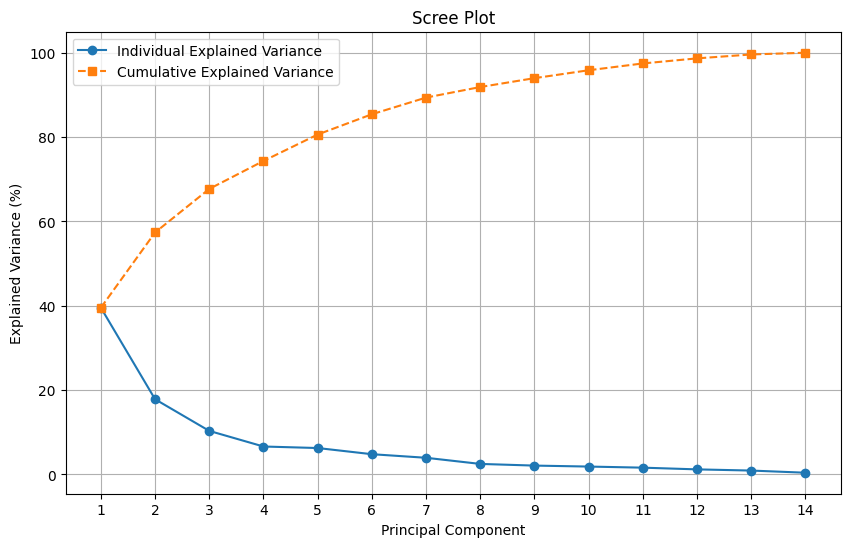

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Sort eigenvalues in descending order (for visual clarity)
sorted_eigenvalues = np.sort(eigen_values)[::-1]

# Calculate explained variance ratio again (sorted)
explained_variance_ratio = [(i / sum(sorted_eigenvalues)) * 100 for i in sorted_eigenvalues]

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, marker='o', label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='s', linestyle='--', label='Cumulative Explained Variance')

plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.xticks(range(1, len(explained_variance_ratio)+1))
plt.grid(True)
plt.legend()
plt.show()


In [68]:
print("Cumulative Explained Variance:", np.cumsum(pca.explained_variance_ratio_))


Cumulative Explained Variance: [0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544]


In [69]:
cum_var = np.cumsum(pca.explained_variance_ratio_)
for i, val in enumerate(cum_var):
    print(f"PC{i+1}: {val:.4f} cumulative variance")


PC1: 0.3620 cumulative variance
PC2: 0.5541 cumulative variance
PC3: 0.6653 cumulative variance
PC4: 0.7360 cumulative variance
PC5: 0.8016 cumulative variance
PC6: 0.8510 cumulative variance
PC7: 0.8934 cumulative variance
PC8: 0.9202 cumulative variance


In [70]:
from sklearn.decomposition import PCA

# Step 1: Define PCA
pca = PCA(n_components=3)  # You can change 3 to 4 or 5 based on scree plot

# Step 2: Fit and transform scaled data
pca_data = pca.fit_transform(scaled_data)

# Step 3: Wrap in a DataFrame
pca_df = pd.DataFrame(
    pca_data,
    columns=['PC1', 'PC2', 'PC3']
)

# Step 4: Check result
print("PCA-transformed Data (first 5 rows):\n", pca_df.head())

# Step 5: Variance explained by selected PCs
print("\nExplained Variance Ratio (for selected PCs):", pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", np.cumsum(pca.explained_variance_ratio_))


PCA-transformed Data (first 5 rows):
         PC1       PC2       PC3
0  3.316751  1.443463 -0.165739
1  2.209465 -0.333393 -2.026457
2  2.516740  1.031151  0.982819
3  3.757066  2.756372 -0.176192
4  1.008908  0.869831  2.026688

Explained Variance Ratio (for selected PCs): [0.36198848 0.1920749  0.11123631]
Cumulative Explained Variance: [0.36198848 0.55406338 0.66529969]


In [89]:
from sklearn.decomposition import PCA

pca_5 = PCA(n_components=5)
pca_5.fit(X_scaled)

print("Explained Variance Ratios of 5 PCs:")
print(pca_5.explained_variance_ratio_)

Explained Variance Ratios of 5 PCs:
[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294]


In [75]:
# Cumulative explained variance
cum_var = np.cumsum(pca.explained_variance_ratio_)

# Find how many components needed to reach 90%
num_components_90 = np.argmax(cum_var >= 0.90) + 1
print(f"Number of components needed to reach 90% variance: {num_components_90}")


Number of components needed to reach 90% variance: 1


In [76]:
import numpy as np

# Assuming pca.explained_variance_ratio_ is already available
explained_var = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_var)

# Print cumulative explained variance for each PC
for i, val in enumerate(cum_var, start=1):
    print(f"PC{i}: {val:.4f}")

# Find number of components needed to reach at least 90% variance
num_components_90 = np.argmax(cum_var >= 0.90) + 1
print(f"\n✅ Number of components needed to reach 90% variance: {num_components_90}")


PC1: 0.3620
PC2: 0.5541
PC3: 0.6653

✅ Number of components needed to reach 90% variance: 1


In [80]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [81]:
kmeans = KMeans(n_clusters=3, random_state=42)


In [82]:
kmeans.fit(scaled_data)


KMeans(n_clusters=3, random_state=42)

In [83]:
original_cluster_labels = kmeans.labels_


In [85]:
sil_score = silhouette_score(scaled_data, original_cluster_labels)
db_score = davies_bouldin_score(scaled_data, original_cluster_labels)


In [86]:
print("Cluster labels (first 10):", original_cluster_labels[:10])
print(f"\nSilhouette Score: {sil_score:.3f}")
print(f"Davies-Bouldin Index: {db_score:.3f}")


Cluster labels (first 10): [2 2 2 2 2 2 2 2 2 2]

Silhouette Score: 0.285
Davies-Bouldin Index: 1.389


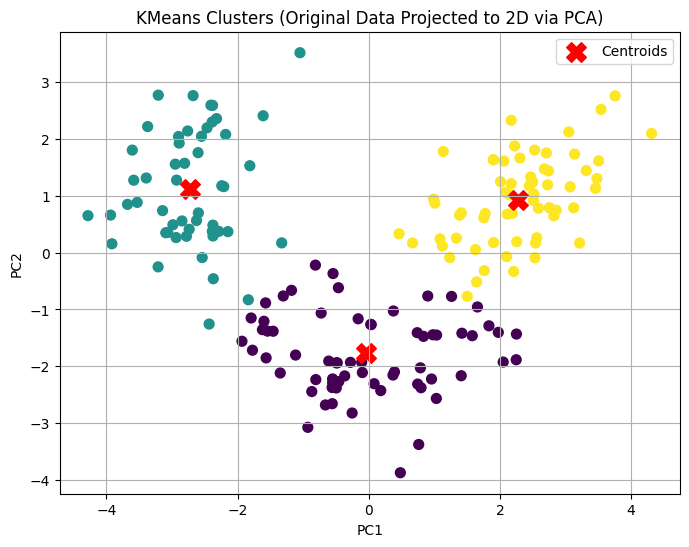

In [87]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: Reduce to 2D for visualization
pca_vis = PCA(n_components=2)
scaled_2d = pca_vis.fit_transform(scaled_data)

# Step 2: Plot KMeans clusters on reduced 2D data
plt.figure(figsize=(8,6))
plt.scatter(scaled_2d[:, 0], scaled_2d[:, 1],
            c=original_cluster_labels,
            cmap='viridis', s=50)

# Step 3: Cluster centers (in 2D)
centers_2d = pca_vis.transform(kmeans.cluster_centers_)
plt.scatter(centers_2d[:, 0], centers_2d[:, 1],
            c='red', marker='X', s=200, label='Centroids')

# Step 4: Final plot touches
plt.title("KMeans Clusters (Original Data Projected to 2D via PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()


In [55]:
from sklearn.decomposition import PCA

# Apply PCA with 8 components
pca_8 = PCA(n_components=8)
pca_data_8 = pca_8.fit_transform(scaled_data)

print("Shape of PCA-transformed data:", pca_data_8.shape)


Shape of PCA-transformed data: (178, 8)


In [54]:
from sklearn.cluster import KMeans

# Apply KMeans with 3 clusters (same as before)
kmeans_pca = KMeans(n_clusters=3, random_state=42)
cluster_labels_pca = kmeans_pca.fit_predict(pca_data_8)

print("Cluster Labels (first 10):", cluster_labels_pca[:10])


NameError: name 'pca_data_8' is not defined

In [64]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluate clustering
sil_pca = silhouette_score(pca_data_8, cluster_labels_pca)
db_pca = davies_bouldin_score(pca_data_8, cluster_labels_pca)

print("Silhouette Score (PCA 8 PCs):", sil_pca)
print("Davies-Bouldin Index (PCA 8 PCs):", db_pca)


NameError: name 'cluster_labels_pca' is not defined

Silhouette Score: 0.3149696954705561
Davies-Bouldin Score: 1.2668818314972183


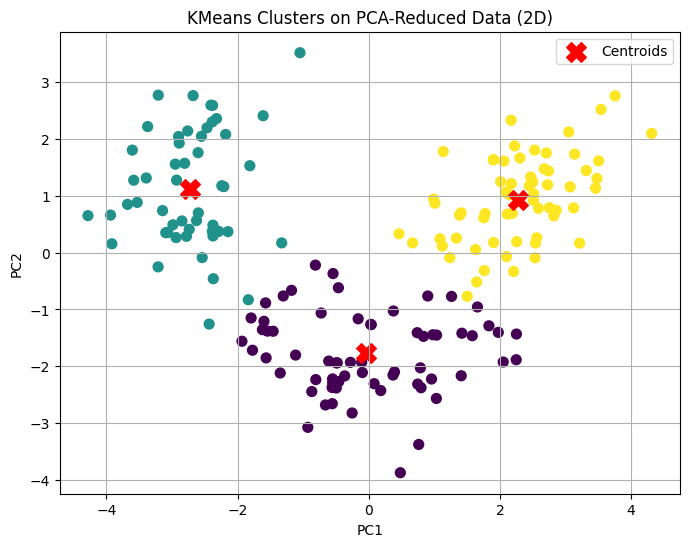

In [63]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Load Data
df = pd.read_csv("/content/wine.csv")
features = df.drop("Type", axis=1)

# Step 1: Standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Step 2: PCA (keep 8 components)
pca = PCA(n_components=8)
pca_data = pca.fit_transform(scaled_data)

# Step 3: Clustering (on PCA-reduced data)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(pca_data)

# Step 4: Evaluate
sil = silhouette_score(pca_data, labels)
db = davies_bouldin_score(pca_data, labels)

print("Silhouette Score:", sil)
print("Davies-Bouldin Score:", db)

# Step 5: Visualize (project PCA to 2D for plotting)
pca_vis = PCA(n_components=2)
vis_data = pca_vis.fit_transform(scaled_data)

# Inverse transform cluster centers from 8D PCA space to 13D scaled space
centers_13d = pca.inverse_transform(kmeans.cluster_centers_)
# Transform 13D centers to 2D for visualization
centers_2d = pca_vis.transform(centers_13d)


plt.figure(figsize=(8,6))
plt.scatter(vis_data[:, 0], vis_data[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("KMeans Clusters on PCA-Reduced Data (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.legend()
plt.show()